In [16]:
import lightgbm as lgb
import pandas as pd
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

In [6]:
df_train = pd.read_csv("./data/imageTrainDataSet.csv")
df_train.head()

,0,1,2,3,4,5,6,7,8,9,...,64,65,66,67,68,69,70,71,72,Target
0,2.802592,0.000000,2.419251,0.000000,25.850954,8.406624,3.889212,1.309759,14.579442,60.298489,...,155.205734,62.641945,0.000000,0.0,1.351078,0.0,0.000000,0.000000,18.597864,1
1,0.000000,0.000000,3.421265,0.000000,7.411167,0.000000,0.000000,0.000000,10.072591,41.298714,...,138.896164,40.952168,0.000000,0.0,0.000000,0.0,0.000000,0.000000,20.201843,1
2,8.689170,0.000000,16.372234,0.000000,2.158112,24.020809,51.093063,0.000000,62.438568,78.934143,...,0.000000,40.056435,0.000000,0.0,0.000000,0.0,6.272342,26.144714,9.841871,1
3,17.297232,0.000000,15.390459,0.000000,10.339233,0.000000,0.000000,0.000000,0.000000,78.790497,...,157.481506,60.294369,0.000000,0.0,0.000000,0.0,1.329466,3.993140,38.569000,1
4,52.470585,83.641388,79.671761,9.335004,32.030472,0.000000,0.000000,49.733284,0.000000,41.290382,...,64.682297,109.422462,19.874949,0.0,0.000000,0.0,15.806639,29.668850,38.129742,1


In [5]:
df_test = pd.read_csv("./data/imageTestDataSet.csv")
df_test.head()

,0,1,2,3,4,5,6,7,8,9,...,64,65,66,67,68,69,70,71,72,Target
0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,54.366787,0.0,0.0,...,97.608917,14.459713,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,1
1,38.258987,0.0,19.445879,0.0,0.0,0.0,0.0,7.791460,0.0,0.0,...,59.617912,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,1
2,41.004650,0.0,22.499952,0.0,0.0,0.0,0.0,1.438439,0.0,0.0,...,66.809647,12.714787,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,1
3,59.235928,0.0,0.000000,0.0,0.0,0.0,0.0,12.839417,0.0,0.0,...,37.821468,12.451595,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,1
4,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,96.897903,6.766070,0.0,0.0,0.098201,0.0,0.0,0.0,0.0,1


In [7]:
X_train=df_train.drop("Target",axis=1)
y_train=df_train["Target"]

X_test=df_test.drop("Target",axis=1)
y_test=df_test["Target"]

In [10]:
lg = lgb.LGBMClassifier(silent=False)
param_dist = {"max_depth": [25,50,75],
              "learning_rate" : [0.03,0.1],
              "num_leaves": [50,150,300],
              "n_estimators": [50,100,150],
             }
grid_search = GridSearchCV(lg, n_jobs=-1, param_grid=param_dist, cv = 3, scoring="roc_auc", verbose=5)

grid_search.fit(X_train, y_train)
grid_search.best_estimator_


Fitting 3 folds for each of 54 candidates, totalling 162 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
/home/maria/anaconda3/lib/python3.6/site-packages/joblib/externals/loky/process_executor.py:706: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:   15.1s
[Parallel(n_jobs=-1)]: Done  64 tasks      | elapsed:  2.5min
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:  6.2min
[Parallel(n_jobs=-1)]: Done 162 out of 162 | elapsed:  6.7min finished


LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=25,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=150, n_jobs=-1, num_leaves=300, objective=None,
               random_state=None, reg_alpha=0.0, reg_lambda=0.0, silent=False,
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

In [12]:
lgbm = lgb.LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=25,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=150, n_jobs=-1, num_leaves=300, objective=None,
               random_state=None, reg_alpha=0.0, reg_lambda=0.0, silent=False,
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)
lgbm.fit(X_train, y_train)


LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=25,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=150, n_jobs=-1, num_leaves=300, objective=None,
               random_state=None, reg_alpha=0.0, reg_lambda=0.0, silent=False,
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

In [19]:
print(lgbm.score(X_test, y_test))

0.9214611872146119


In [14]:
Y_pred=lgbm.predict(X_test)


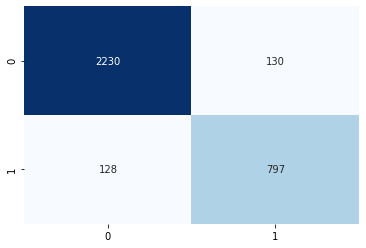

In [17]:
cfm=confusion_matrix(y_test, Y_pred)
sns.heatmap(cfm, cbar=False, annot=True, cmap="Blues", fmt="d")